####  Cho tập dữ liệu winequality 

In [1]:
#1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên và thông tin về dữ liệu, thống kê mô tả.
# Import thư viện pandas
import pandas as pd

# Đọc dữ liệu từ file CSV (thay 'ten_file.csv' bằng tên file của bạn)
df = pd.read_csv('winequality-red.csv',delimiter=";")

# Hiển thị 5 dòng đầu tiên
print("5 dòng đầu tiên của dữ liệu:")
print(df.head(5))



5 dòng đầu tiên của dữ liệu:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

In [2]:
# Hiển thị thông tin về dữ liệu
print("\nThông tin về dữ liệu:")
print(df.info())



Thông tin về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
# Hiển thị thống kê mô tả
print("\nThống kê mô tả:")
print(df.describe())


Thống kê mô tả:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             

In [4]:
#2. Phân tích khám phá dữ liệu 
#2.1 kiểm tra giá trị thiếu isnull
print("Kiểm tra giá trị thiếu trong dữ liệu:")
# Hiển thị số lượng giá trị thiếu trong mỗi cột
print(df.isnull().sum())

Kiểm tra giá trị thiếu trong dữ liệu:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
df = df.apply(pd.to_numeric, errors='coerce')  # Chuyển tất cả về số, nếu lỗi thì thành NaN


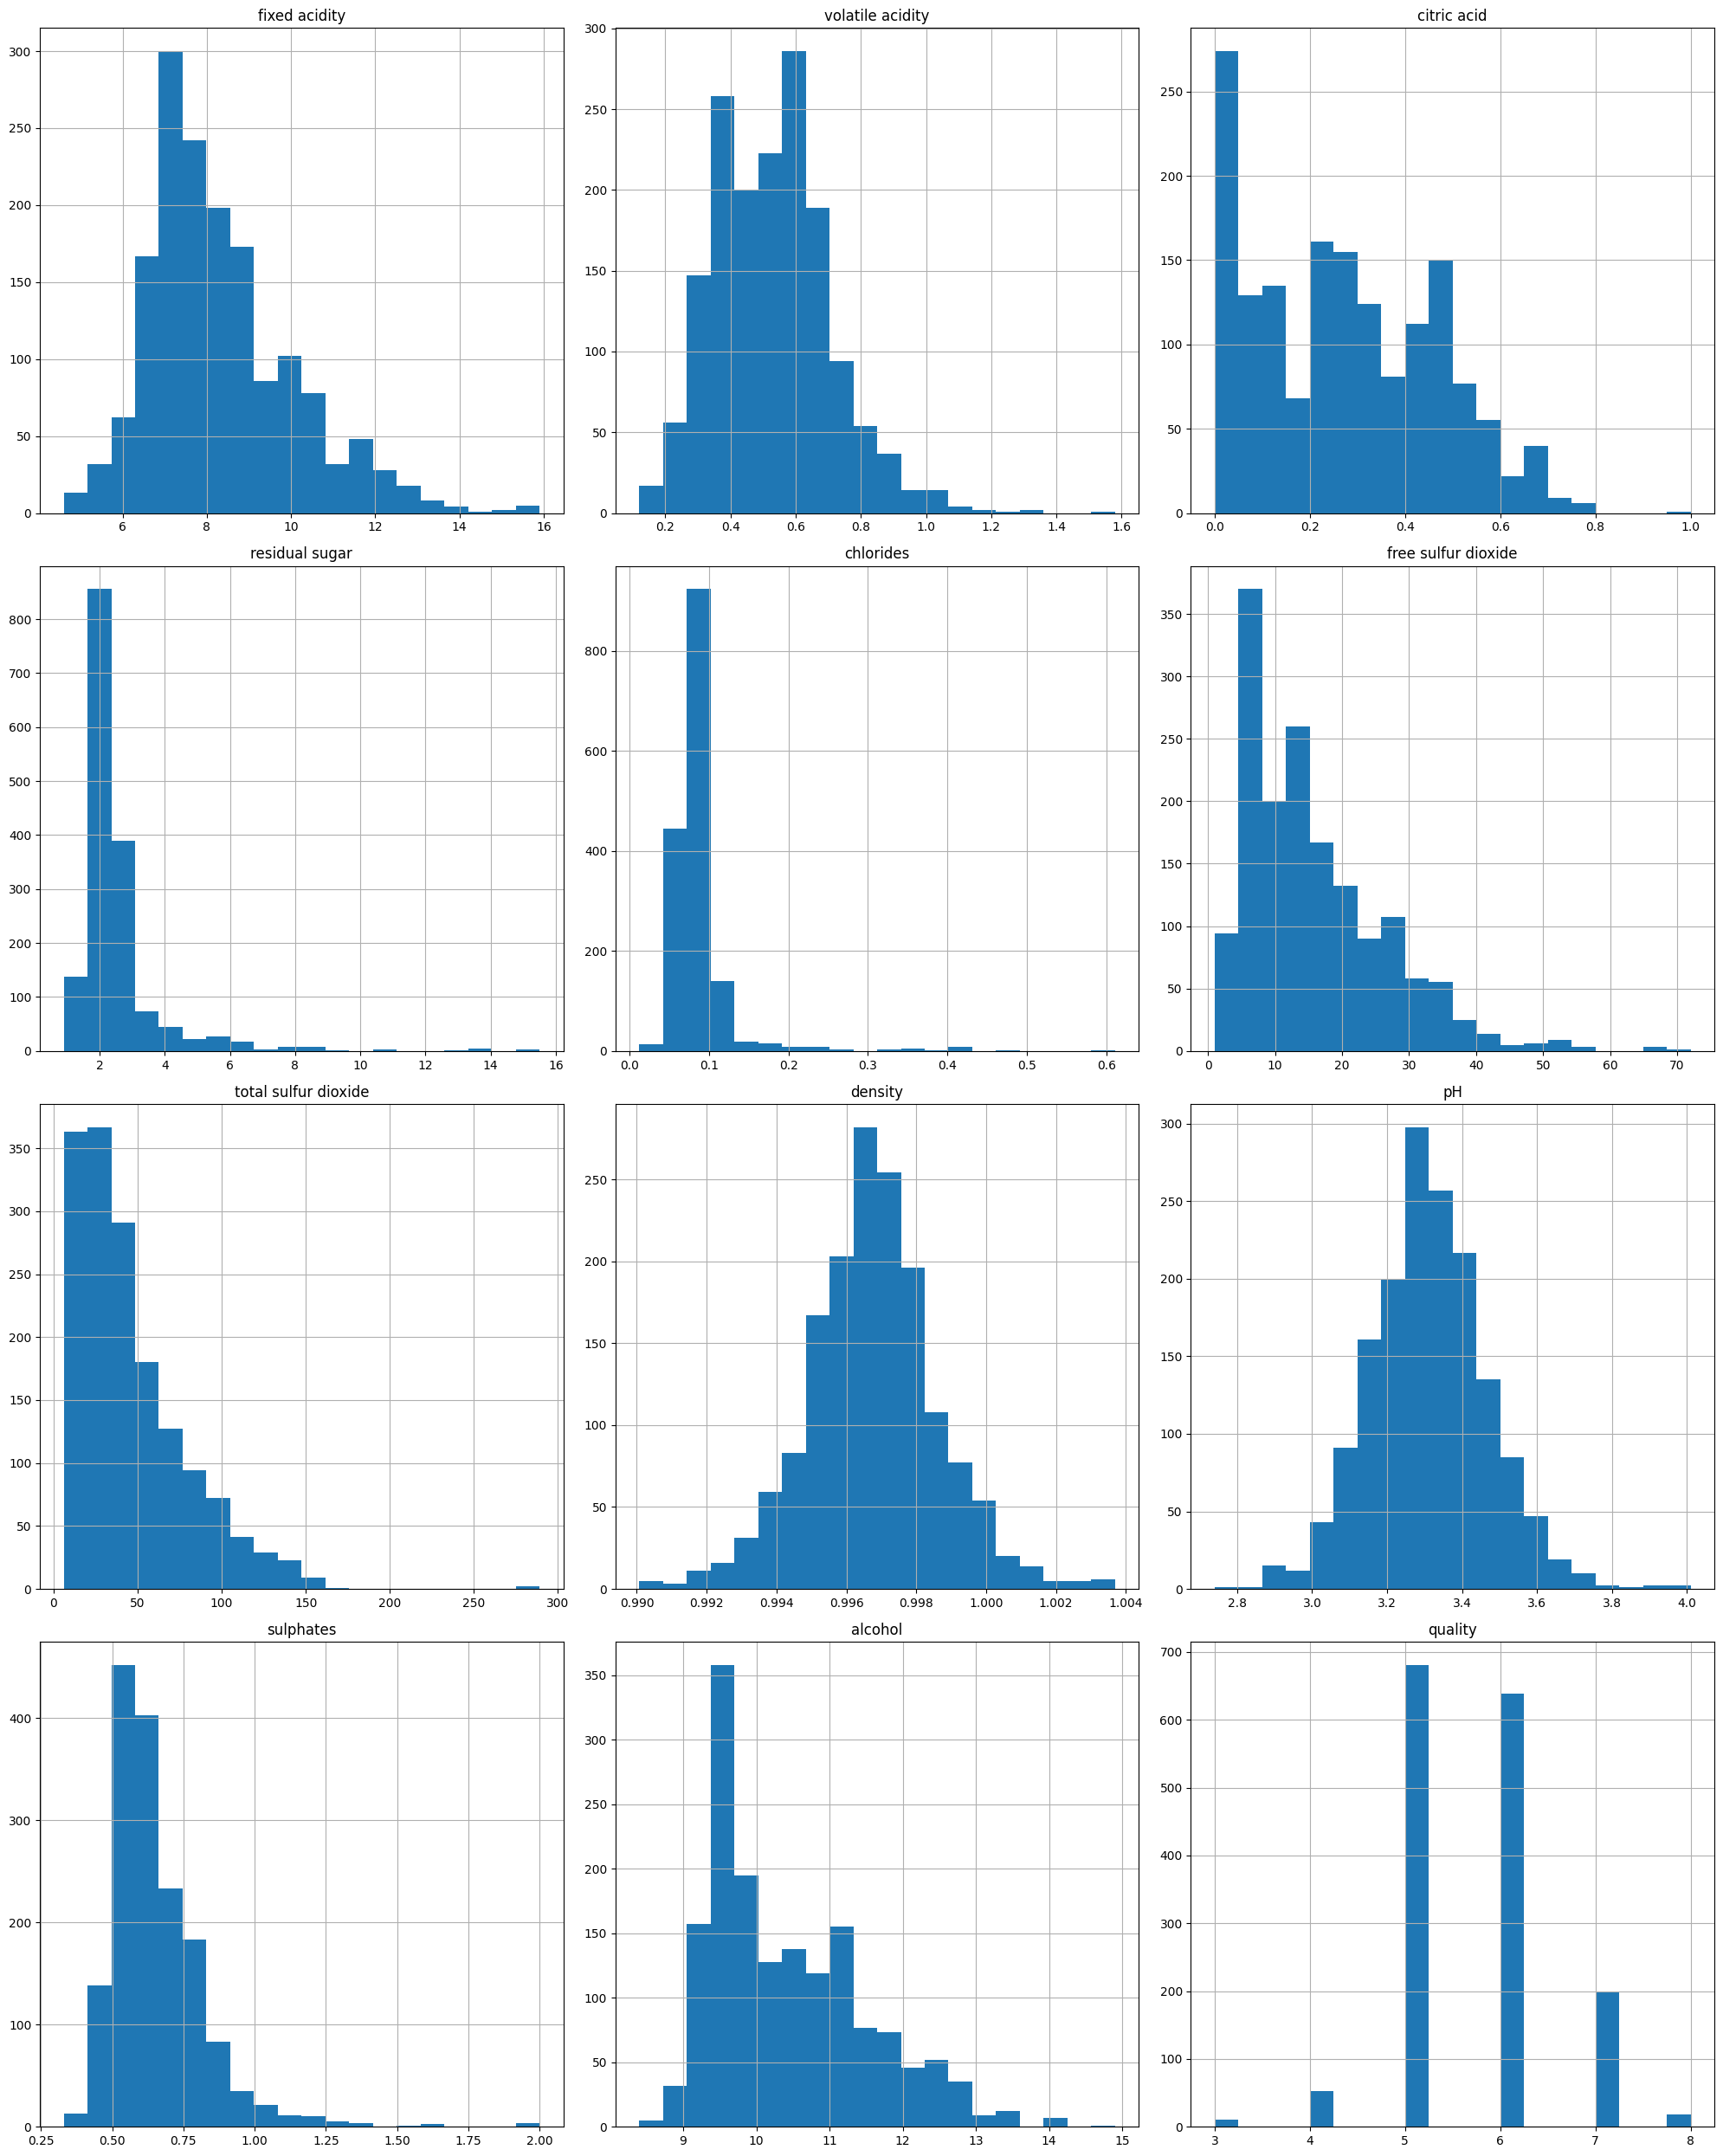

In [6]:
#2.2 Vẽ histogram cho tất cả các biến và nhận xét
import matplotlib.pyplot as plt

df.hist(bins = 20,figsize = (20,25))
plt.tight_layout()
plt.show()



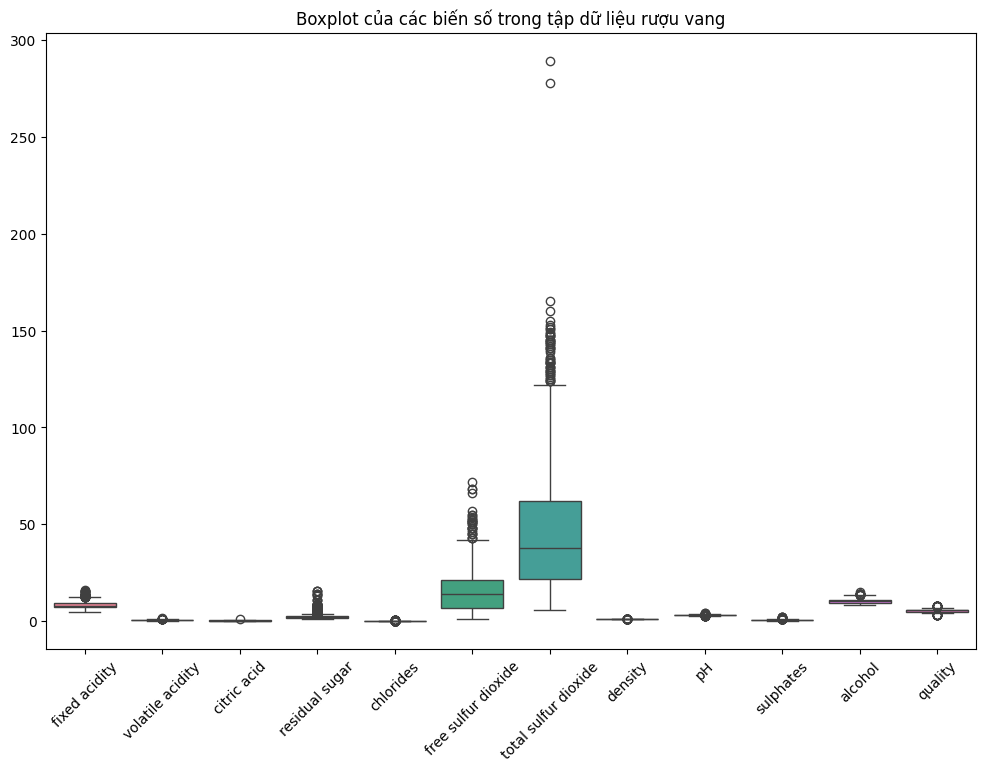

In [7]:
#2.3 Vẽ boxplot cho tất cả các biến và nhận xét
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ boxplot cho tất cả các biến số
plt.figure(figsize=(12, 8))  # Sửa lỗi bằng cách thêm kích thước hợp lệ
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Xoay nhãn trục x cho dễ nhìn
plt.title("Boxplot của các biến số trong tập dữ liệu rượu vang")
plt.show()
#Nhận xét


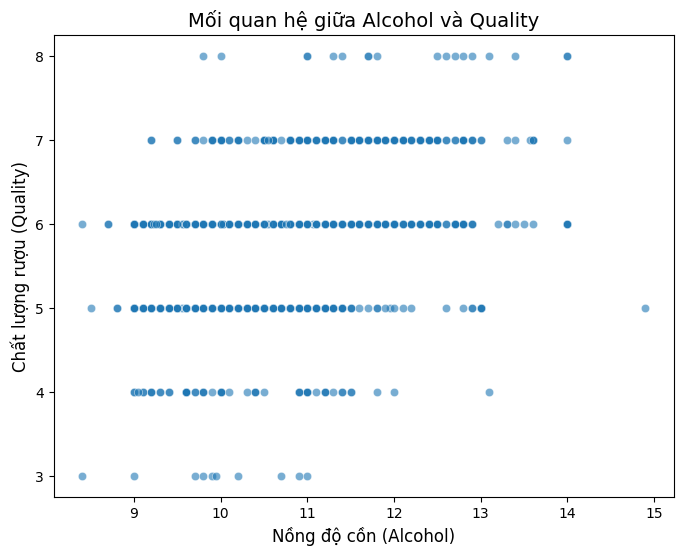

In [8]:
#2.4 Vẽ scatterplot cho "alcohol" và "quality"
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ scatterplot giữa "alcohol" và "quality"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="alcohol", y="quality", alpha=0.6)  

# Thêm tiêu đề và nhãn trục
plt.title("Mối quan hệ giữa Alcohol và Quality", fontsize=14)
plt.xlabel("Nồng độ cồn (Alcohol)", fontsize=12)
plt.ylabel("Chất lượng rượu (Quality)", fontsize=12)

# Hiển thị biểu đồ
plt.show()


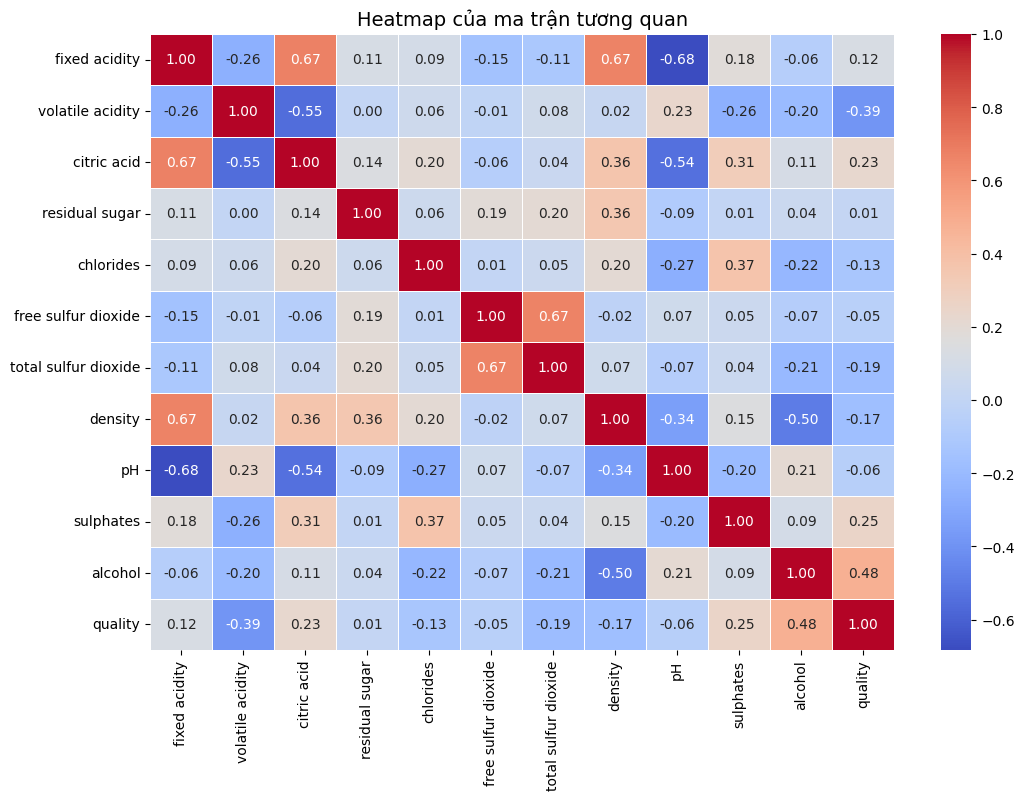

In [9]:
#3. tính toán ma trận tương quan và vẽ heat map của ma trận tương quan đó
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))  # Kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Thêm tiêu đề
plt.title("Heatmap của ma trận tương quan", fontsize=14)

# Hiển thị biểu đồ
plt.show()


In [10]:
#4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn
import pandas as pd
import numpy as np

# Đọc dữ liệu từ file CSV
df = pd.read_csv("winequality-red.csv", sep=";")

# Chọn tỷ lệ train-test (ví dụ: 80% train, 20% test)
train_ratio = 0.8  

# Xáo trộn dữ liệu để tránh bias
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Xác định số lượng mẫu cho tập train
train_size = int(len(df) * train_ratio)

# Chia dữ liệu thành tập train và test
train_data = df_shuffled.iloc[:train_size]   # 80% dữ liệu
test_data = df_shuffled.iloc[train_size:]    # 20% dữ liệu

# Hiển thị kích thước của từng tập
print(f"Tập train: {train_data.shape}")
print(f"Tập test: {test_data.shape}")

# Tách X (features) và y (target)
X_train, y_train = train_data.drop(columns=["quality"]), train_data["quality"]
X_test, y_test = test_data.drop(columns=["quality"]), test_data["quality"]

# Kiểm tra kết quả
print("\n5 dòng đầu tiên của X_train:")
print(X_train.head())
print("\n5 dòng đầu tiên của y_train:")
print(y_train.head())


Tập train: (1279, 12)
Tập test: (320, 12)

5 dòng đầu tiên của X_train:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.7              0.56         0.08            2.50      0.114   
1            7.8              0.50         0.17            1.60      0.082   
2           10.7              0.67         0.22            2.70      0.107   
3            8.5              0.46         0.31            2.25      0.078   
4            6.7              0.46         0.24            1.70      0.077   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 14.0                  46.0   0.9971  3.24       0.66   
1                 21.0                 102.0   0.9960  3.39       0.48   
2                 17.0                  34.0   1.0004  3.28       0.98   
3                 32.0                  58.0   0.9980  3.33       0.54   
4                 18.0                  34.0   0.9948  3.39       0.60   

   alcohol  
0

In [11]:
#4.1 Xáo trộn dữ liệu 
# Đọc dữ liệu từ file CSV
df = pd.read_csv("winequality-red.csv", sep=";")

# Xáo trộn dữ liệu bằng cách tráo đổi chỉ số ngẫu nhiên
np.random.seed(42)  # Đặt seed để kết quả luôn giống nhau
shuffled_indices = np.random.permutation(len(df))  # Tạo danh sách chỉ số ngẫu nhiên

# Tạo DataFrame mới với các chỉ số bị tráo đổi
df_shuffled = df.iloc[shuffled_indices].reset_index(drop=True)

# Hiển thị 5 dòng đầu tiên sau khi xáo trộn
print(df_shuffled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.7              0.56         0.08            2.50      0.114   
1            7.8              0.50         0.17            1.60      0.082   
2           10.7              0.67         0.22            2.70      0.107   
3            8.5              0.46         0.31            2.25      0.078   
4            6.7              0.46         0.24            1.70      0.077   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 14.0                  46.0   0.9971  3.24       0.66   
1                 21.0                 102.0   0.9960  3.39       0.48   
2                 17.0                  34.0   1.0004  3.28       0.98   
3                 32.0                  58.0   0.9980  3.33       0.54   
4                 18.0                  34.0   0.9948  3.39       0.60   

   alcohol  quality  
0      9.6        6  
1      9.5        5  
2      9.9        6 

In [12]:
#4.2 Chia dữ liệu với 80% huấn luyện và 20% test
import pandas as pd
import numpy as np

# Đọc dữ liệu từ file CSV
df = pd.read_csv("winequality-red.csv", sep=";")

# Xáo trộn dữ liệu bằng cách tráo đổi chỉ số ngẫu nhiên
np.random.seed(42)  # Đặt seed để kết quả giống nhau mỗi lần chạy
shuffled_indices = np.random.permutation(len(df))  # Tạo danh sách chỉ số ngẫu nhiên

# Xác định kích thước tập train (80%)
train_size = int(len(df) * 0.8)

# Chia tập train và test theo chỉ số đã xáo trộn
train_indices = shuffled_indices[:train_size]  # 80% đầu làm tập train
test_indices = shuffled_indices[train_size:]   # 20% cuối làm tập test

train_data = df.iloc[train_indices].reset_index(drop=True)  
test_data = df.iloc[test_indices].reset_index(drop=True)

# Hiển thị kích thước của tập train và test
print(f"Tập train: {train_data.shape}")
print(f"Tập test: {test_data.shape}")

# Kiểm tra 5 dòng đầu tiên của tập train
print("\n5 dòng đầu tiên của tập train:")
print(train_data.head())

# Kiểm tra 5 dòng đầu tiên của tập test
print("\n5 dòng đầu tiên của tập test:")
print(test_data.head())


Tập train: (1279, 12)
Tập test: (320, 12)

5 dòng đầu tiên của tập train:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.7              0.56         0.08            2.50      0.114   
1            7.8              0.50         0.17            1.60      0.082   
2           10.7              0.67         0.22            2.70      0.107   
3            8.5              0.46         0.31            2.25      0.078   
4            6.7              0.46         0.24            1.70      0.077   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 14.0                  46.0   0.9971  3.24       0.66   
1                 21.0                 102.0   0.9960  3.39       0.48   
2                 17.0                  34.0   1.0004  3.28       0.98   
3                 32.0                  58.0   0.9980  3.33       0.54   
4                 18.0                  34.0   0.9948  3.39       0.60   

   alcohol  

In [13]:
#4.3. Tách dữ liệu
# Tách đặc trưng (X) và nhãn (y)
X_train = train_data.drop(columns=["quality"])  # Loại bỏ cột 'quality', chỉ giữ lại đặc trưng
y_train = train_data["quality"]  # Lấy nhãn mục tiêu

X_test = test_data.drop(columns=["quality"])  # Tương tự với tập test
y_test = test_data["quality"]

# Kiểm tra kích thước của các tập dữ liệu sau khi tách
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Kiểm tra 5 dòng đầu tiên của X_train và y_train
print("\n5 dòng đầu tiên của X_train:")
print(X_train.head())

print("\n5 dòng đầu tiên của y_train:")
print(y_train.head())


X_train: (1279, 11), y_train: (1279,)
X_test: (320, 11), y_test: (320,)

5 dòng đầu tiên của X_train:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.7              0.56         0.08            2.50      0.114   
1            7.8              0.50         0.17            1.60      0.082   
2           10.7              0.67         0.22            2.70      0.107   
3            8.5              0.46         0.31            2.25      0.078   
4            6.7              0.46         0.24            1.70      0.077   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 14.0                  46.0   0.9971  3.24       0.66   
1                 21.0                 102.0   0.9960  3.39       0.48   
2                 17.0                  34.0   1.0004  3.28       0.98   
3                 32.0                  58.0   0.9980  3.33       0.54   
4                 18.0                  34.0   0.9948  3.39

In [14]:
#4.4. Tách đặc trưng và nhãn
# Tách đặc trưng (X) và nhãn (y) cho tập huấn luyện
X_train = train_data.drop(columns=["quality"])  # Loại bỏ cột 'quality', chỉ giữ lại đặc trưng
y_train = train_data["quality"]  # Lấy nhãn mục tiêu

# Tách đặc trưng (X) và nhãn (y) cho tập kiểm tra
X_test = test_data.drop(columns=["quality"])  # Tương tự với tập test
y_test = test_data["quality"]

# Kiểm tra kích thước của các tập dữ liệu sau khi tách
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Hiển thị 5 dòng đầu tiên của tập đặc trưng và nhãn
print("\n5 dòng đầu tiên của X_train:")
print(X_train.head())

print("\n5 dòng đầu tiên của y_train:")
print(y_train.head())


X_train: (1279, 11), y_train: (1279,)
X_test: (320, 11), y_test: (320,)

5 dòng đầu tiên của X_train:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.7              0.56         0.08            2.50      0.114   
1            7.8              0.50         0.17            1.60      0.082   
2           10.7              0.67         0.22            2.70      0.107   
3            8.5              0.46         0.31            2.25      0.078   
4            6.7              0.46         0.24            1.70      0.077   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 14.0                  46.0   0.9971  3.24       0.66   
1                 21.0                 102.0   0.9960  3.39       0.48   
2                 17.0                  34.0   1.0004  3.28       0.98   
3                 32.0                  58.0   0.9980  3.33       0.54   
4                 18.0                  34.0   0.9948  3.39

In [15]:
#5. Chuẩn bị dữ liệu 
#5.1. Khởi tạo bộ dữ liệu chuẩn hóa
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
#5.2. Chuẩn hóa huấn luyện
# Chuẩn hóa dữ liệu huấn luyện bằng Standardization (Z-score normalization)
def standardize(data):
    return (data - data.mean()) / data.std()

# Áp dụng chuẩn hóa cho tập huấn luyện
X_train_standardized = X_train.apply(standardize)

# Kiểm tra kết quả
print("Dữ liệu huấn luyện sau khi chuẩn hóa (5 dòng đầu tiên của X_train_standardized):")
print(X_train_standardized.head())


Dữ liệu huấn luyện sau khi chuẩn hóa (5 dòng đầu tiên của X_train_standardized):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.355786          0.183414    -0.990857       -0.021492   0.543054   
1      -0.298762         -0.149254    -0.521368       -0.644662  -0.121563   
2       1.354930          0.793306    -0.260541        0.116990   0.397669   
3       0.100405         -0.371033     0.208947       -0.194595  -0.204640   
4      -0.926025         -0.371033    -0.156211       -0.575421  -0.225409   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.170699             -0.010939  0.176604 -0.454647   0.016447   
1             0.501510              1.681218 -0.399532  0.511503  -1.074714   
2             0.117391             -0.373544  1.905012 -0.197007   1.956288   
3             1.557840              0.351666  0.647988  0.125043  -0.710994   
4             0.213421             -0.373544 -1.028044 

In [17]:
#5.3 Chuẩn hóa kiểm tra
# Sử dụng mean và std của X_train để chuẩn hóa X_test
X_test_standardized = (X_test - X_train.mean()) / X_train.std()

# Kiểm tra kết quả
print("Dữ liệu kiểm tra sau khi chuẩn hóa (5 dòng đầu tiên của X_test_standardized):")
print(X_test_standardized.head())


Dữ liệu kiểm tra sau khi chuẩn hóa (5 dòng đầu tiên của X_test_standardized):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.184714         -1.369038     0.887097       -0.506180  -0.142332   
1      -0.754953         -0.149254    -0.677865       -0.506180  -0.204640   
2      -1.325192         -0.149254    -1.408180       -0.783144  -0.640795   
3      -0.184714          0.349748    -1.147353       -0.367698   0.023822   
4      -1.040072          0.017080    -1.095188       -0.367698  -0.516179   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             1.173720              0.653837 -0.918054  0.318273   0.016447   
1            -0.554819             -0.705931 -0.210978  1.413242  -0.286654   
2            -0.074669             -0.615280 -1.195647  0.318273  -1.256575   
3            -0.362759             -0.433978  0.307544  0.318273  -0.286654   
4             1.269750             -0.071373 -0.980906  0.

In [18]:
#6.Ứng dụng mô hình hồi quy tuyến tính
#6.1. Khởi tạo
from sklearn.linear_model import LinearRegression
model = LinearRegression()




In [19]:
#6.2 Huấn luyện
model.fit(X_train_scaled,y_train)




LinearRegression()

In [20]:
#6.3 Dự đoán trên tập kiểm tra
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)


In [21]:
#7. Đánh giá mô hình tính MSE và R^2
# Tính MSE
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Tính R² Score
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

print(f"R² Score: {r2_score:.4f}")


Mean Squared Error (MSE): 0.3501
R² Score: 0.4224


In [22]:
#BTVN


# BTVN
1. Hoàn thành bài tập trên sao cho đoạn code có thể chạy mượt mà và chính xác
2. Cho bộ dữ liệu sau: howlongwelive.csv
2.1. Bao nhiêu cột và bao nhiêu hàng
2.2. Danh sách tên của các cột
2.3. Thử dùng df["status"]
2.4. Có bao nhiêu nước đang phát triển và các nước phát triển.
2.5. Tính Min max mean median của Alcohol
2.6.1 Đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
2.6.2 Lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và gdp cao hơn mức trung bình
2.7. 

In [23]:
# 1. hoàn thành bt ở trên sao cho đoạn code có thể chạy mượt mà và chính xác

# 2. Cho bộ dữ liệu sau: howlongwelive
howlongwelive = pd.read_csv('howlongwelive.csv')

# 2.1 cho biết có bn cột và bn hàng
rows, columns = howlongwelive.shape
print(f"Số hàng: {rows}, Số cột: {columns}")

# 2.2 cho biết danh sách tên của các cột
print("Danh sách tên các cột:", howlongwelive.columns.tolist())

# 2.3 thử dùng df["status"]
print(howlongwelive["Status"].head())

# 2.4 tính số lượng các nước đang phát triển và các nước phát triển
developing_countries = howlongwelive[howlongwelive["Status"] == "Developing"].shape[0]
developed_countries = howlongwelive[howlongwelive["Status"] == "Developed"].shape[0]
print(f"Số lượng các nước đang phát triển: {developing_countries}")
print(f"Số lượng các nước phát triển: {developed_countries}")

# 2.5 tính min, max, mean, median của Alcohol
min_alcohol = howlongwelive["Alcohol"].min()
max_alcohol = howlongwelive["Alcohol"].max()
mean_alcohol = howlongwelive["Alcohol"].mean()
median_alcohol = howlongwelive["Alcohol"].median()
print(f"Min Alcohol: {min_alcohol}, Max Alcohol: {max_alcohol}, Mean Alcohol: {mean_alcohol}, Median Alcohol: {median_alcohol}")

# 2.6
# 2.6.1 đếm những hàng có alcohol nhiều hơn mức trung bình và liệt kê những quốc gia đó
above_mean_alcohol = howlongwelive[howlongwelive["Alcohol"] > mean_alcohol]
print(f"Số lượng quốc gia có alcohol nhiều hơn mức trung bình: {above_mean_alcohol.shape[0]}")
print("Danh sách các quốc gia đó:", above_mean_alcohol["Country"].tolist())

# 2.6.2 lấy những quốc gia có trình độ học vấn và gdp cao hơn mức trung bình
mean_education = howlongwelive["Schooling"].mean()
mean_gdp = howlongwelive["GDP"].mean()
high_edu_gdp_countries = howlongwelive[(howlongwelive["Schooling"] > mean_education) & (howlongwelive["GDP"] > mean_gdp)]
print("Danh sách các quốc gia có trình độ học vấn và gdp cao hơn mức trung bình:", high_edu_gdp_countries["Country"].tolist())


Số hàng: 2938, Số cột: 22
Danh sách tên các cột: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object
Số lượng các nước đang phát triển: 2426
Số lượng các nước phát triển: 512
Min Alcohol: 0.01, Max Alcohol: 17.87, Mean Alcohol: 4.602860787172012, Median Alcohol: 3.755
Số lượng quốc gia có alcohol nhiều hơn mức trung bình: 1171
Danh sách các quốc gia đó: ['Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Antigua and Barbuda', 'Antigua 